# stats for biology with python
In this course, we go through the principles of statistics and machine learning based on the book titled *Python Programming for Biology*: https://www.cambridge.org/core/books/python-programming-for-biology/61762A9F672FDD8B2DD3FFF8773027B2. We focus on the following chapters:

1. Chapter 22, Statistics
2. Chapter 23, Clustering and discrimination
3. Chapter 24, Machine learning

Presenter: Dr Ali Fahmi

## 1- Statistics
### 1-1- Statistical analyses
#### Samples and significance
A key idea of statistical analyses is that the data we collect contains a limited number of **samples** from some kind of underlying probability
distribution. This simplifies the data but allows forming mathematical models to test hypotheses and draw conclusions. For this, we would look at the observed data to estimate the parameters of the distribution. The answer to parameter estimation is true with a certain probability, often called a **confidence level**. 

The probability distribution is often used for **prediction**, i.e., a model of what we expect at **random** and the competing hypothesis would mean that something significantly non-random was happening.

Here, we define a normal distribution with a certain mean, standard deviation, and number of samples. The random distribution is built with the NumPy library. More details: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html.

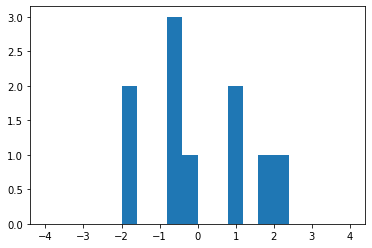

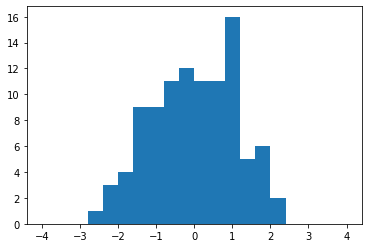

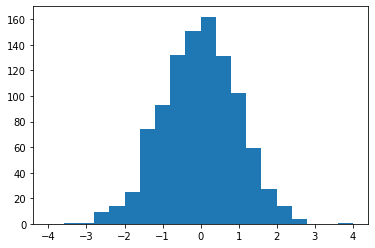

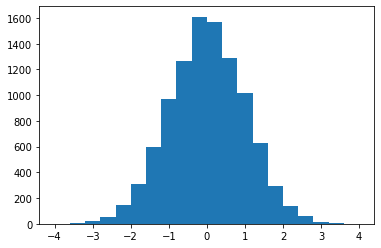

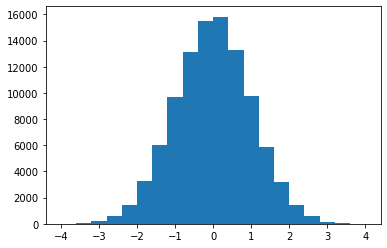

In [1]:
from matplotlib import pyplot
from numpy import random
mean = 0.0
stdDev = 1.0
for nPoints in (10, 100, 1000, 10000, 100000):
    sample = random.normal(mean, stdDev, nPoints)
    pyplot.hist(sample, bins=20, range=(-4,4))#, normed=True) #fixed the code!
    pyplot.show()

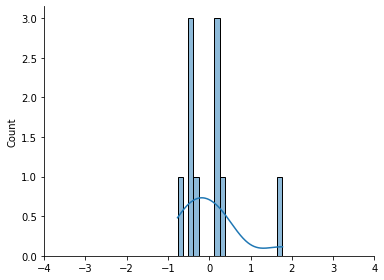

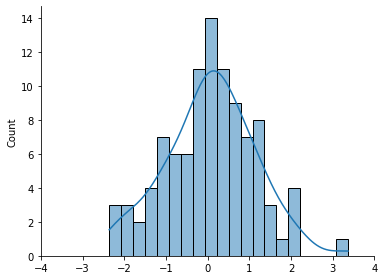

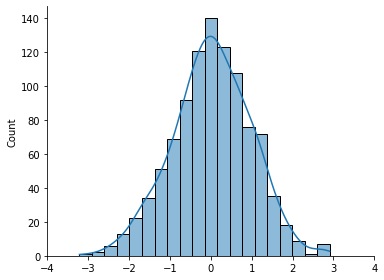

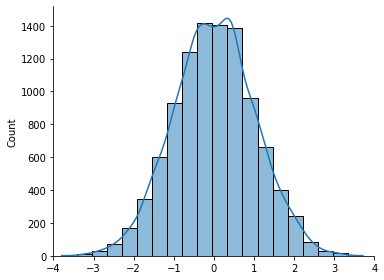

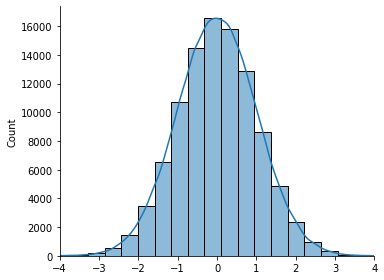

In [2]:
#create histogram with density curve overlaid
import seaborn as sns
import matplotlib.pyplot as plt
for nPoints in (10, 100, 1000, 10000,100000):
    sample = random.normal(mean, stdDev, nPoints)
    g = sns.displot(sample, kde=True, bins=20, kde_kws={"clip": [-4, 4]}, height=4, aspect=1.35)
    g.set(xlim=(-4, 4))

### 1-2- Simple statistical parameters
#### Mode
The mode is the most commonly occurring value in a set of data.

We can find the mode using the following codes. 

In [8]:
#first create a set called values
values = [1,2,2,3,2,1,4,2,3,1,0]
#find mode
counts = [(values.count(val), val) for val in set(values)]
count, mode = max(counts)
print('Mode =', mode)

Mode = 2


Another way of finding the mode using the SciPy library. For details, see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html

In [14]:
from scipy import stats
from numpy import array
#convert values set into an array
valArray = array(values, float) #can be int (integer)!
#find mode
mode, count = stats.mode(valArray)
print('Mode =', mode[0])

Mode = 2.0


#### Median
The median represents the middle-ranked value when the data is placed in its sorted order. You can find the median using NumPy library. For details, see: https://numpy.org/doc/stable/reference/generated/numpy.median.html

In [15]:
from numpy import median
med = median(valArray)
print('Median =', med)

Median = 2.0


Another way of finding the median is by defining a function, instead of using a library.

In [18]:
def getMedian(values):
    vSorted = sorted(values)
    nValues = len(values)
    if nValues % 2 == 0: # even number
        index = nValues//2
        median = sum(vSorted[index-1:index+1])/2.0
    else:
        index = (nValues-1)//2
        median = vSorted[index]
    return median

In [19]:
#use getMedian function
med = getMedian(values)
print('Median =', med)

Median = 2


#### Mean
The mean is the numerical average of a set of values. You can calculate the mean as shown below. Consider the mean is the numerical average of a set of values.

In [20]:
mean = sum(values)/float(len(values))
print('Mean = ', mean)

Mean =  1.9090909090909092


You can rounding the mean in printing only.

In [21]:
print('Mean = %.3f' %mean)

Mean = 1.909


Or you can use the following rounding function to round the mean forever! For details, see: https://docs.python.org/3/library/functions.html#round

In [ ]:
mean_rounded = round(mean, 2)
print('Rounded mean =', mean_rounded)

Another way of finding the median by defining a function, instead of using NumPy library. For details, see: https://numpy.org/doc/stable/reference/generated/numpy.mean.html

In [ ]:
from numpy import array, mean
valArray = array(values, float)
m = valArray.mean()
# or
m = mean(valArray)
print('Mean =', m)

#### Variance
You can calculate the variance using the following codes. Consider the variance is a measure of how far the values are spread from the mean.

In [ ]:
n = float(len(values))
mean = sum(values)/n
diffs = [v-mean for v in values]
#unbiased estimate of variance (since it divides by n-1)
variance = sum([d*d for d in diffs])/(n-1) 
print('Variance = %.3f' %variance) 

Variance can be calculated using NumPy as shown below. It has a parameter, called ddof, standign for Delta Degrees of Freedom that is the divisor used in the calculation. If ddof is given 1, it generates unbiased variance by calculating *n-1*, otherwise it calculates biased variance since ddof is 0 by default. For details, see: https://numpy.org/doc/stable/reference/generated/numpy.var.html

In [ ]:
from numpy import array
valArray = array(values)
variance = valArray.var()
print('Biased variance = %.3f' %variance)
#unbiased estimate. ddof stands for Delta Degrees of Freedom
variance = valArray.var(ddof=1)
print('Unbiased variance = %.3f' %variance)

#### Standard deviation and standard error

Standard deviation can be calculated with the variance using NumPy, as shown below. For details, see: https://numpy.org/doc/stable/reference/generated/numpy.std.html

In [ ]:
from numpy import std, sqrt
stdDev = sqrt(variance)
stdDev = std(valArray)
stdDev = valArray.std(ddof=1)
print('Standard deviation = %.3f' %stdDev)

Standard error is related to standrd deviation. It is the error from the mean, and can be calculated using SciPy, as shown below. For details, see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html#scipy.stats.sem

In [ ]:
stdErrMean = valArray.std(ddof=1)/sqrt(len(valArray))
from scipy.stats import sem
stdErrMean = sem(valArray, ddof=1)
print('Standard error = %.3f' %stdErrMean)

You can calculate the skewness using the following codes. Consider the skewness of a distribution is a measure of asymmetry or lopsidedness. For details, see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html#scipy.stats.skew

In [ ]:
from scipy.stats import skew
from numpy import random
samples = random.gamma(3.0, 2.0, 100)
skewdness = skew(samples)
print('Skewnes = %.3f' %skewdness)

### 1-3- Statistical tests
#### Significance and hypotheses
#### Binomial test
Binomial test is concerned with the number of occurrences of an event that has a fixed probability of occurring, given a certain number of trials. Bionial test can be conducted using SciPy as shown below. For details, see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom_test.html

In [ ]:
from scipy.stats import binom_test
count_success, nTrials, pEvent = 530, 1000, 0.5
result = binom_test(count_success, nTrials, pEvent)
print('Binomial two tail =', result)

#### Z-scores and Z-test
A Z-score (also called the standard score) is the number of standard deviations an observed value is different from the mean.

$$
  z = \frac{x-\mu}{\sigma}
$$

In [ ]:
from numpy import abs
mean = 1.76
stdDev = 0.075
values = array([1.8, 1.9, 2.0])
zScores = abs(values - mean)/stdDev
print('Z scores = ', zScores)

In [ ]:
from scipy import stats
zScores = stats.zscore(values)
print('Z scores = ', zScores)

Note that SciPy provides the stats.zscore() function, but it operates differently because it estimates its own sample mean and sample. For details of z-scores, see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.zscore.html#scipy.stats.mstats.zscore

In [ ]:
from scipy.stats import zscore, norm
samples = norm.rvs(mean, stdDev, size=3) # Values for testing
zScores = zscore(samples, ddof=1) # Unbiased estimators
print('Estimated Z scores = ', zScores)

A related concept to this is the Z-test, which can be used when we have samples that are taken from a normal distribution where the true mean and standard deviation are known. The Z-test is effectively the calculation of a Z-score for a sample mean. 

$$
  z = \frac{\overline{x}-\mu_{0}}{\frac{\sigma}{\sqrt{n}}}
$$

In [ ]:
from numpy import sqrt
from scipy.special import erf
def zTestMean(sMean, nSamples, normMean, stdDev, oneSided=True):
    zScore = abs(sMean - normMean) / (stdDev / sqrt(nSamples))
    prob = 1-erf(zScore/sqrt(2))
    if oneSided:
        prob *= 0.5
    return prob

In [ ]:
samples = array([1.752, 1.818, 1.597, 1.697, 1.644, 1.593, 1.878, 1.648, 1.819, 1.794, 1.745, 1.827])
mean = 1.76
stDev = 0.075
result = zTestMean(samples.mean(), len(samples), mean, stdDev, oneSided=True)
print('Mean of Z-test = ', result)

#### T-tests
T-tests are like Z-tests, but will be used if we do not know the underlying mean and standard deviations of the probability distributions. The important difference compared to the Z-score is that the sample standard deviation (i.e., s) is used.

$$
  t = \frac{\overline{x}-\mu_{x}}{\frac{s}{\sqrt{n}}}
$$

T-statistics and the two-tailed probability can be calculated using SciPy, as shown below. More details:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.ttest_1samp.html#scipy.stats.mstats.ttest_1samp

In [ ]:
from scipy.stats import ttest_1samp
trueMean = 1.76
samples = array([1.752, 1.818, 1.597, 1.697, 1.644, 1.593, 1.878, 1.648, 1.819, 1.794, 1.745, 1.827])
tStat, twoTailProb = ttest_1samp(samples, trueMean)
print('T-statistic and two-tailed probability = ', tStat, twoTailProb)

A T-test can be applied to determine whether two sets of samples, each from a normal distribution, have the same underlying mean, assuming that they have same variance.

In [ ]:
from scipy.stats import ttest_ind
samples1 = array([1.752, 1.818, 1.597, 1.697, 1.644, 1.593])
samples2 = array([1.878, 1.648, 1.819, 1.794, 1.745, 1.827])
tStat, twoTailProb = ttest_ind(samples1, samples2)
print('T-statistic and two-tailed probability = ', tStat, twoTailProb)

### 1-4- Correlation and covariance
#### Covariance
Covariance is a measure of whether two random variables vary simultaneously as their values increase or decrease. 

$$
  \sigma_{xy} = \sum_{k=1}^n \frac{(x_{i}-\mu_{x})(y_{i}-\mu_{y})}{N}
$$

Covariance can be calculated using NumPy library. Details: https://numpy.org/doc/stable/reference/generated/numpy.cov.html.

In [ ]:
from numpy import random, cov
xVals = random.normal(0.0, 1.0, 100)
yVals1 = random.normal(0.0, 1.0, 100) # Random, independent of xVals
deltas = random.normal(0.0, 0.75, 100)
yVals2 = 0.5 + 2.0 * (xVals - deltas) # Derived from xVals
cov1 = cov(xVals, yVals1)
cov1

In [ ]:
cov2 = cov(xVals, yVals2)
cov2

This difference is because the matrix shows:

$$
\left(\begin{array}{cc} 
\sigma_{x}^2 & \sigma_{xy}\\ 
\sigma_{yx} & \sigma_{y}^2
\end{array}\right)
$$ 


#### Correlation coefficient
Pearson’s correlation coefficient and it gives us a handy measure of how well two quantities are linearly correlated:

$$
  r = \frac{\sigma_{xy}}{\sigma_{x}\sigma_{y}}
$$

This correlation can be calculated using NumPy. Details: https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html

In [ ]:
from numpy import corrcoef
r1 = corrcoef(xVals, yVals1)[0, 1]
r2 = corrcoef(xVals, yVals2)[0, 1]
print('Correlation between xVals and yVals1 = ', r1)
print('Correlation between xVals and yVals2 = ', r2)

#### Simple linear regression

Pearson’s correlation coefficient provides a handy way of doing a line fit called simple linear regression. The gradient of the line can be calculated by dividing the covariance of X and Y by the variance of X.  

In [ ]:
from numpy import cov, var, mean, random
xVals = random.normal(0.0, 1.0, 100)
yVals = 2.0 + -0.7 * xVals + random.normal(0.0, 0.2, 100)
grad = cov(xVals, yVals)/var(xVals, ddof=1)
yInt = mean(yVals) - grad * mean(xVals)
print('LR 1:', grad[0, 1], yInt[0, 1]) # there was a mistake in the code!

You can see that the fitted line has a gradient and intercept close to the artificial test values of -0.7 and 2.0.

Parameters of the linear regression can be calculated using SciPy. Details: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

In [ ]:
from scipy.stats import linregress
linregress(xVals, yVals)

In [ ]:
xValsFit = [xVals.min(),xVals.max()]
yValsFit = [yInt[0, 1] + x*grad[0, 1] for x in xValsFit] # same mistake in the code!
pyplot.plot(xVals, yVals, 'o')
pyplot.plot(xValsFit, yValsFit)
pyplot.show()

## 2- Clustering and discrimination
### 2-2- Clustering methods
#### Simple threshold clustering
This method groups items of data into clusters based upon how close (similar) the items of data are. The algorithm works by initially considering an item of data as a potentially separate cluster and then expands the cluster by adding any other
items that are sufficiently close, i.e. the distance between data points is less than a threshold.

In [1]:
#function to calculate Euclidian distance between two items
from numpy import dot, sqrt
def euclideanDist(vectorA, vectorB):
    diff = vectorA-vectorB
    return sqrt(dot(diff,diff))

In [2]:
#function to calculate distances of items and identify neighbours
def findNeighbours(data, distFunc, threshold):
    neighbourDict = {}
    n = len(data)
    for i in range(n):
        neighbourDict[i] = []
    for i in range(0,n-1):
        for j in range(i+1,n):
            dist = distFunc(data[i], data[j])
            if dist < threshold:
                neighbourDict[i].append(j)
                neighbourDict[j].append(i)
    return neighbourDict

In [3]:
#
def simpleCluster(data, threshold, distFunc=euclideanDist):
    neighbourDict = findNeighbours(data, distFunc, threshold)
    clusters = []
    pool = set(range(len(data)))
    while pool:
        i = pool.pop()
        neighbours = neighbourDict[i]
        cluster = set()
        cluster.add(i)
        pool2 = set(neighbours)
        while pool2:
            j = pool2.pop()
            if j in pool:
                pool.remove(j)
                cluster.add(j)
                neighbours2 = neighbourDict[j]
                pool2.update(neighbours2)
        clusters.append(cluster)
    clusterData = []
    for cluster in clusters:
        clusterData.append( [data[i] for i in cluster] )
    return clusterData

In [4]:
from numpy import random, vstack
spread = 0.12
sizeDims = (100,2)
data = [random.normal(( 0.0, 0.0), spread, sizeDims),
        random.normal(( 1.0, 1.0), spread, sizeDims),
        random.normal(( 1.0, 0.0), spread, sizeDims)]
data = vstack(data) # Stack arrays (concatenation)
random.shuffle(data) # Randomise order
clusters = simpleCluster(data, 0.10)

In [5]:
clusters

[[array([1.26582957, 0.02817303]),
  array([ 1.16251191, -0.19946978]),
  array([ 1.09260311, -0.03134616]),
  array([ 1.27746788, -0.16121291]),
  array([0.84869529, 0.11877617]),
  array([ 0.97557973, -0.25675528]),
  array([0.90089506, 0.05744822]),
  array([ 1.03016425, -0.07169498]),
  array([0.9223908 , 0.07473996]),
  array([0.9404232 , 0.07920851]),
  array([ 1.01229531, -0.09505683]),
  array([1.0634849 , 0.13308523]),
  array([0.78685919, 0.00145914]),
  array([0.92576139, 0.14242274]),
  array([1.04194136, 0.07531366]),
  array([0.87468773, 0.02957618]),
  array([0.95077309, 0.08416037]),
  array([1.06901434, 0.09352617]),
  array([ 0.97806609, -0.00762273]),
  array([1.13577157, 0.05593144]),
  array([1.07725757, 0.0710149 ]),
  array([0.80595886, 0.00970632]),
  array([ 1.05197596, -0.26676904]),
  array([ 0.86028022, -0.00493502]),
  array([ 0.98733801, -0.08003377]),
  array([ 1.04642495, -0.06390846]),
  array([0.97127849, 0.03390114]),
  array([ 0.99282613, -0.14866709

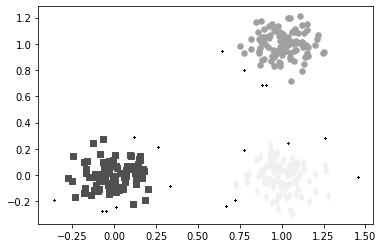

In [6]:
#
from matplotlib import pyplot
colors = ['#F0F0F0','#A0A0A0','#505050', '#D0D0D0','#808080','#202020']
markers = ['d','o','s','>','^']
i = 0
for cluster in clusters:
    allX, allY = zip(*cluster)
    if len(cluster) > 3:
        color = colors[i % len(colors)]
        marker = markers[i % len(markers)]
        pyplot.scatter(allX, allY, s=30, c=color, marker=marker)
        i += 1
    else:
        pyplot.scatter(allX, allY, s=5, c='black', marker='P')
pyplot.show()

#### Density-based clustering

In [7]:
def dbScanCluster(data, threshold, minNeighbour, distFunc=euclideanDist):
    neighbourDict = findNeighbours(data, distFunc, threshold)
    clusters = []
    noise = set()
    pool = set(range(len(data)))
    while pool:
        i = pool.pop()
        neighbours = neighbourDict[i]
        if len(neighbours) < minNeighbour:
            noise.add(i)
        else:
            cluster = set()
            cluster.add(i)
            pool2 = set(neighbours)
            while pool2:
                j = pool2.pop()
                if j in pool:
                    pool.remove(j)
                    neighbours2 = neighbourDict.get(j, [])
                    if len(neighbours2) < minNeighbour:
                        noise.add(j)
                else:
                    pool2.update(neighbours2)
                    cluster.add(j)
            clusters.append(cluster)
    noiseData = [data[i] for i in noise]
    clusterData = []
    for cluster in clusters:
        clusterData.append( [data[i] for i in cluster] )
    return clusterData, noiseData

In [8]:
# clusters, noise = dbScanCluster(data, 0.10, 2) # this took 3 hours, but no result! - perhaps wrong code or something!

#### K-means clustering

In [9]:
from numpy import array, random
from random import sample
def kMeans(data, k, centers=None):
    if centers is None:
        centers = array(sample(list(data), k))
    change = 1.0
    while change > 1e-8:
        clusters = [[] for x in range(k)]
        for vector in data:
            diffs = centers - vector
            dists = (diffs * diffs).sum(axis=1)
            closest = dists.argmin()
            clusters[closest].append(vector)
        change = 0
        for i, cluster in enumerate(clusters):
            cluster = array(cluster)
            center = cluster.sum(axis=0)/len(cluster)
            diff = center - centers[i]
            change += (diff * diff).sum()
            centers[i] = center
    return centers, clusters

In [10]:
# k-menas clustering with 
testDataA = random.random((1000,2)) # No clumps
centers, clusters = kMeans(testDataA, 3)

In [11]:
centers

array([[0.43651403, 0.20524642],
       [0.79208121, 0.63674194],
       [0.25526859, 0.69716917]])

In [30]:
clusters

In [13]:
testDataB1 = random.normal(0.0, 2.0, (100,2))
testDataB2 = random.normal(7.0, 2.0, (100,2))
testDataB = vstack([testDataB1, testDataB2]) # Two clumps
centers, clusters = kMeans(testDataB, 4)

In [ ]:
centers

In [ ]:
clusters

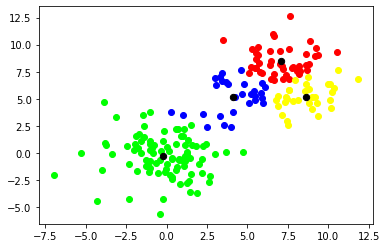

In [14]:
# plot clustering 
from matplotlib import pyplot
colors = ['#FF0000','#00FF00','#0000FF','#FFFF00','#00FFFF','#FF00FF']
for i, cluster in enumerate(clusters):
    x, y = zip(*cluster)
    color = colors[i % len(colors)]
    pyplot.scatter(x, y, c=color, marker='o')
x, y = zip(*centers)
pyplot.scatter(x, y, s=40, c='black', marker='o')
pyplot.show()

#### Improving k-means

In [37]:
from numpy import zeros, ones, vstack
from random import randint
def kMeansSpread(data, k):
    n = len(data)
    index = randint(0, n-1)
    indices = set([index])
    influence = zeros(n)
    while len(indices) < k:
        diff = data - data[index]
        sumSq = (diff * diff).sum(axis=1) + 1.0
        influence += 1.0 / sumSq
        index = influence.argmin()
        while index in indices:
            index = randint(0, n-1)
        indices.add(index)
    centers = vstack([data[i] for i in indices])
    return kMeans(data, k, centers)

In [39]:
centers, clusters = kMeansSpread(testDataB, 4)

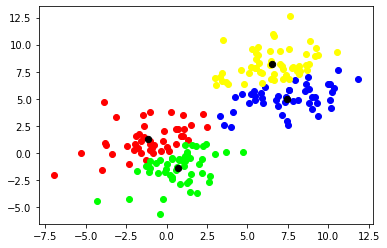

In [40]:
# plot clustering 
from matplotlib import pyplot
colors = ['#FF0000','#00FF00','#0000FF','#FFFF00','#00FFFF','#FF00FF']
for i, cluster in enumerate(clusters):
    x, y = zip(*cluster)
    color = colors[i % len(colors)]
    pyplot.scatter(x, y, c=color, marker='o')
x, y = zip(*centers)
pyplot.scatter(x, y, s=40, c='black', marker='o')
pyplot.show()

K-means clustering can be done with Scikit-Learn library. Details are available: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html.

In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4).fit(testDataB)
kmeans.labels_

array([1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1, 1, 3, 3, 1, 3, 1, 1,
       1, 1, 3, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3,
       1, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1,
       1, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1,
       3, 1, 3, 3, 1, 1, 1, 3, 1, 3, 3, 1, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0,
       0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2,
       0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2,
       0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0,
       0, 2])

<AxesSubplot:xlabel='col_1', ylabel='col_2'>

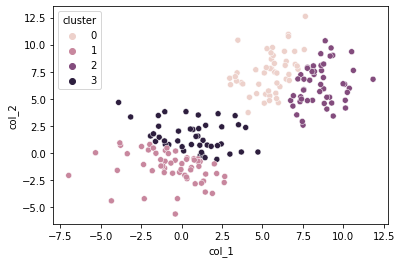

In [36]:
# plot clusters made with Scikit-Learn library 
import pandas as pd    
import seaborn as sns
testDataB_df = pd.DataFrame(testDataB, columns=['col_1', 'col_2'])
testDataB_df['cluster'] = kmeans.labels_
sns.scatterplot(data = testDataB_df, x = 'col_1', y = 'col_2', hue = 'cluster')

### 2-3- Data discrimination
#### Principal component analysis
Principal component analysis (PCA) gives the eigenvectors of the covariance matrix. Taking the eigenvalues of these in size order we can find the most significant [or] principal components that account for most of the variance in the data.

In [60]:
from numpy import cov, linalg, sqrt, zeros, ones, diag
def principalComponentAnalysis(data, n):
    samples, features = data.shape
    meanVec = data.mean(axis=0)
    dataC = (data - meanVec).T
    covar = cov(dataC)
    evals, evecs = linalg.eig(covar)
    indices = evals.argsort()[::-1]
    evecs = evecs[:,indices]
    basis = evecs[:,:n]
    energy = evals[:n].sum()
    # norm wrt to variance
    #sd = sqrt(diag(covar))
    #zscores = dataC.T / sd
    return basis, energy

In [61]:
testData = random.normal(0.0, 2.0, (100,2))
shear = array([[2,1],[1,0]])
testData = dot(testData, shear)
testData

array([[ 2.76870792e+00, -3.56735187e-01],
       [ 2.99841285e+00,  2.33266402e+00],
       [ 4.69185563e+00,  1.76974915e+00],
       [ 5.98335925e+00,  2.33261658e+00],
       [ 7.04161555e+00,  3.19590614e+00],
       [ 1.55905510e+00,  1.79666654e+00],
       [-1.79591858e+00, -8.74564204e-01],
       [-3.41176948e+00, -1.68450603e+00],
       [-5.47181177e+00, -1.85528247e+00],
       [ 2.69188380e-01,  5.34953142e-01],
       [-2.32223068e-03,  9.03586092e-01],
       [ 1.51202660e+00,  4.93794600e-02],
       [ 3.54188776e+00,  1.98080904e+00],
       [ 2.38940278e+00,  1.43429875e+00],
       [-3.61903672e+00, -3.22301172e+00],
       [ 1.67723310e+00,  5.59949942e-01],
       [-4.40097835e+00, -8.81774713e-01],
       [ 4.42781786e-01,  7.43565032e-02],
       [ 8.58828775e+00,  2.79572985e+00],
       [ 3.39157937e+00,  5.11612463e-01],
       [ 4.91719249e+00,  1.66946711e+00],
       [-3.24717501e+00, -2.91947831e+00],
       [ 3.89095939e+00,  1.69728651e+00],
       [-4.

In [62]:
basis, energy = principalComponentAnalysis(testData, 2)
print('Full PCA:', basis, energy)

Full PCA: [[ 0.92418389 -0.38194781]
 [ 0.38194781  0.92418389]] 21.836968062362473


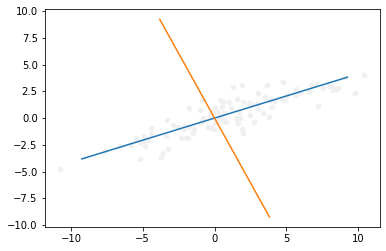

In [83]:
# plot original data (before transformation)
from matplotlib import pyplot
x,y = zip(*testData)
pyplot.scatter(x, y, s=20, c='#F0F0F0', marker='o')
x,y = zip(-10*basis, 10*basis)
pyplot.plot(x, y)

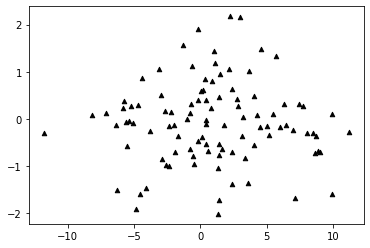

In [90]:
# plot transformed data after applying PCA
transformed = dot(testData, basis)
x,y = zip(*transformed)
pyplot.scatter(x, y, s=20, c='#000000', marker='^')
pyplot.show()

PCA can be done with Scikit-Learn library. Details are available: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html.

In [78]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
testData_pca = pca.fit_transform(testData)
testData_pca

array([[ -1.49473867,  -1.3158704 ],
       [ -2.73423841,   1.08189373],
       [ -4.08428685,  -0.08514989],
       [ -5.49285968,  -0.05824386],
       [ -6.80061466,   0.33539576],
       [ -1.1992841 ,   1.13629304],
       [  2.92159928,  -0.05099053],
       [  4.72429817,  -0.182355  ],
       [  6.69338376,   0.44664481],
       [  0.47469862,   0.46289961],
       [  0.58482581,   0.90728713],
       [ -0.48844864,  -0.4605591 ],
       [ -3.10211893,   0.54913597],
       [ -1.82827246,   0.48424908],
       [  5.50348009,  -1.52505191],
       [ -0.8361411 ,  -0.05179835],
       [  5.33190759,   0.93734252],
       [  0.49019027,  -0.02908   ],
       [ -8.07717774,  -0.62518878],
       [ -2.40204992,  -0.75126188],
       [ -4.25423704,  -0.26389586],
       [  5.04387756,  -1.38656299],
       [ -3.3164345 ,   0.15378187],
       [  1.67195216,  -0.5660646 ],
       [  3.16078024,   0.22459463],
       [ -3.14129297,  -0.49088633],
       [  3.87024466,   0.57769561],
 

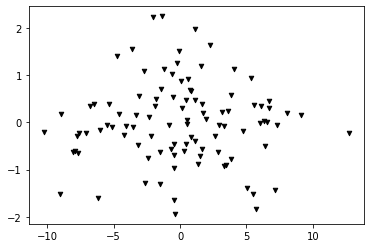

In [91]:
# plot transformed data (PCA with Scikit-Learn library) 
x,y = zip(*testData_pca)
pyplot.scatter(x, y, s=20, c='#000000', marker='v')
pyplot.show()

## 3- Machine learning
### 3-1- K-nearest neighbours
A method to classify an unknown data vector by calculating the distance or similarity between points, i.e., comparing the unknown data to data vectors for which there is a known classification.

In [2]:
#distance calculation
def getFeatureDistance(vector1, vector2):
    distance = 0.0
    for a, b in zip(vector1, vector2):
        delta = a-b
        distance += delta * delta
    return distance

In [4]:
#taking k closest neighbours
def kNearestNeighbour(knowns, query, k=7):
    if k >= len(knowns):
        raise Exception('Length of training data must be larger than k')
    dists = []
    for vector, cat in knowns[:k]:
        dist = getFeatureDistance(vector, query)
        dists.append( (dist, cat) ) # Vector could be included
    dists.sort()
    closest = dists[:k]
    counts = {}
    for dist, cat in closest:
        counts[cat] = counts.get(cat, 0) + 1
    bestCount = max(counts.values())
    bestCats = [cat for cat in counts if counts[cat] == bestCount]
    for dist, cat in closest:
        if cat in bestCats:
            return cat

#### Example
A set of colour vectors are placed into two named categories, warm and cool, with equal number of each category to have unbiased prediction results. 

In [5]:
knownClasses = [((1.0, 0.0, 0.0), 'warm'), # red
                ((0.0, 1.0, 0.0), 'cool'), # green
                ((0.0, 0.0, 1.0), 'cool'), # blue
                ((0.0, 1.0, 1.0), 'cool'), # cyan
                ((1.0, 1.0, 0.0), 'warm'), # yellow
                ((1.0, 0.0, 1.0), 'warm'), # magenta
                ((0.0, 0.0, 0.0), 'cool'), # black
                ((0.5, 0.5, 0.5), 'cool'), # grey
                ((1.0, 1.0, 1.0), 'cool'), # white
                ((1.0, 1.0, 0.5), 'warm'), # light yellow
                ((0.5, 0.0, 0.0), 'warm'), # maroon
                ((1.0, 0.5, 0.5), 'warm'), # pink
                ]

In [6]:
result = kNearestNeighbour(knownClasses, (0.7,0.7,0.2), k=3)
print('Colour class:', result) # cool yellowish colour!

Colour class: cool


### 3-2- Feed-forward artificial neural networks
The neural network is composed of a series of nodes arranged into three layers (input, middle or hidden, and output), but could have more layers! In feed-forward mechanism, input signals enter into the nodes of the first layer, then to those in the hidden layer, and finally move to those in the output layer. 

The number of input nodes represents the size of the input vector. The number of hidden nodes used will depend on the type and complexity but will normally be optimised to give the best predictions (between 3 and 10).

In [1]:
from numpy import array, tanh, zeros, ones, random, sum, append
#prediction function
def neuralNetPredict(inputVec, weightsIn, weightsOut):
    signalIn = append(inputVec, 1.0) # input layer
    prod = signalIn * weightsIn.T
    sums = sum(prod, axis=1)
    signalHid = tanh(sums) # hidden layer
    prod = signalHid * weightsOut.T
    sums = sum(prod, axis=1)
    signalOut = tanh(sums) # output layer
    return signalIn, signalHid, signalOut

In [3]:
#training function
def neuralNetTrain(trainData, numHid, steps=100, rate=0.5, momentum=0.2):
    #initialising numbers of nodes and minimum error value
    numInp = len(trainData[0][0])
    numOut = len(trainData[0][1])
    numInp += 1
    minError = None
    #making initial signal vectors as arrays of required sizes
    sigInp = ones(numInp)
    sigHid = ones(numHid)
    sigOut = ones(numOut)
    #initialising weight matrices with random values
    wInp = random.random((numInp, numHid))-0.5
    wOut = random.random((numHid, numOut))-0.5
    bestWeightMatrices = (wInp, wOut)
    #initialising change matrices that indicate how much the weigh matrices differ from one training cycle to the next
    cInp = zeros((numInp, numHid))
    cOut = zeros((numHid, numOut))
    #initialising training data
    for x, (inputs, knownOut) in enumerate(trainData):
        trainData[x] = (array(inputs), array(knownOut))
    #begin training
    for step in range(steps): # xrange() in Python 2
        random.shuffle(trainData) # Important
        error = 0.0
        #getting input feature vector in each for loop
        for inputs, knownOut in trainData:
            sigIn, sigHid, sigOut = neuralNetPredict(inputs, wInp, wOut)  
            #apply back-propagation to reduce error
            diff = knownOut - sigOut
            error += sum(diff * diff) 
            #adjustment to output layer
            gradient = ones(numOut) - (sigOut*sigOut)
            outAdjust = gradient * diff
            #adjustment to hidden layer
            diff = sum(outAdjust * wOut, axis=1)
            gradient = ones(numHid) - (sigHid*sigHid)
            hidAdjust = gradient * diff
            #update output
            change = outAdjust * sigHid.reshape(numHid, 1)
            wOut += (rate * change) + (momentum * cOut)
            cOut = change
            #update input
            change = hidAdjust * sigIn.reshape(numInp, 1)
            wInp += (rate * change) + (momentum * cInp)
            cInp = change
        #check improvment of minimum error
        if (minError is None) or (error < minError):
            minError = error
            bestWeightMatrices = (wInp.copy(), wOut.copy())
            print("Step: %d Error: %f" % (step, error))
    return bestWeightMatrices

#### Example

In [8]:
#define data
data = [[[0,0], [0]],
        [[0,1], [1]],
        [[1,0], [1]],
        [[1,1], [0]]]
#training
wMatrixIn, wMatrixOut = neuralNetTrain(data, 2, 1000)
#predicting
for inputs, knownOut in data:
    sIn, sHid, sOut = neuralNetPredict(array(inputs), wMatrixIn, wMatrixOut)
    print(knownOut, sOut[0])

Step: 0 Error: 1.679160
Step: 1 Error: 1.243400
Step: 3 Error: 1.203500
Step: 5 Error: 1.182707
Step: 6 Error: 1.110416
Step: 7 Error: 1.043538
Step: 10 Error: 1.034678
Step: 12 Error: 0.992481
Step: 13 Error: 0.985588
Step: 14 Error: 0.926996
Step: 15 Error: 0.895601
Step: 18 Error: 0.864088
Step: 19 Error: 0.850727
Step: 22 Error: 0.837584
Step: 23 Error: 0.815856
Step: 27 Error: 0.783909
Step: 28 Error: 0.777162
Step: 30 Error: 0.777046
Step: 34 Error: 0.775094
Step: 35 Error: 0.754048
Step: 37 Error: 0.745625
Step: 39 Error: 0.728422
Step: 41 Error: 0.722249
Step: 45 Error: 0.598111
Step: 53 Error: 0.538254
Step: 54 Error: 0.386650
Step: 59 Error: 0.363258
Step: 64 Error: 0.350288
Step: 66 Error: 0.146592
Step: 72 Error: 0.128248
Step: 83 Error: 0.110006
Step: 84 Error: 0.104976
Step: 86 Error: 0.054854
Step: 95 Error: 0.052264
Step: 107 Error: 0.030073
Step: 117 Error: 0.024943
Step: 122 Error: 0.024626
Step: 130 Error: 0.023336
Step: 133 Error: 0.019484
Step: 144 Error: 0.019356


Neural networks can be made with Scikit-Learn library. Details are available: https://scikit-learn.org/stable/modules/neural_networks_supervised.html.

In [18]:
from sklearn.neural_network import MLPClassifier
X = [[0, 0], [0,1], [1,0], [1, 1]]
y = [0, 1, 1, 0]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 4), random_state=1)
clf.fit(X, y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 4), random_state=1,
              solver='lbfgs')

In [35]:
#prediction of seen data
preds = clf.predict_proba([[0, 0], [0, 1], [1,0], [1,1]])
preds_1 = [item[1] for item in preds]
print(preds_1)

[0.0001099675811655932, 0.9999909493271045, 1.0, 0.0001099675811655932]


In [39]:
#prediction of unseen data
preds = clf.predict_proba([[2, 2], [-1, -2]])
preds_1 = [item[1] for item in preds]
print(preds_1)

[0.0001099675811655932, 1.0]
